# Network Biology project 

In [64]:
library(readr)
library(dplyr)
library(ape)
library(rotl)
library(phytools)
library(expm)
library(readxl)
library(RCy3)
source("helper_functions.r")

In [51]:
# loading of the trait data and set target family
birdbase <- read_excel("BIRDBASE%20v2025.1%20Sekercioglu%20et%20al.%20Final.xlsx")
bird <- read_tsv("BirdFuncDat.txt",col_names  = TRUE)
fam1 <- "Phasianidae"   
fam2 <- "Anatidae"    

There were 20 warnings (use warnings() to see them)


Rows: 9995 Columns: 40
── Column specification ──────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (15): PassNonPass, IOCOrder, BLFamilyLatin, BLFamilyEnglish, Taxo, Scientific, English...
dbl (24): SpecID, BLFamSequID, Diet-Inv, Diet-Vend, Diet-Vect, Diet-Vfish, Diet-Vunk, Diet...
lgl  (1): Record-Comment

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Warning message:
One or more parsing issues, call `problems()` on your data frame for details, e.g.:
  dat <- vroom(...)
  problems(dat) 


Warning message:
In collapse_singles(tr, show_progress) :
  Dropping singleton nodes with labels: Bonasa ott684039, Meleagridinae ott781250, Catreus ott521333, Pucrasia ott572164, Rhizothera ott207160, Ithaginis ott979425, Lerwa ott3596086, Dendroperdix ott5340751, Afropavo ott51352, Rheinardia ott727338, Argusianus ott521341, Haematortyx ott401526, Pternistis ott5925677, mrcaott144486ott3596045, Anurophasis ott3596091, Margaroperdix ott681155, Xenoperdix ott54192, Caloperdix ott207171, Rollulus ott352754, Melanoperdix ott3596092, mrcaott204719ott554512, Ptilopachus ott867024
Warning messages:
1: Anas andium are not matched 
2: In collapse_singles(tr, show_progress) :
  Dropping singleton nodes with labels: Asarcornis ott30844, Hymenolaimus ott423363, Marmaronetta ott552051, Cyanochen ott140300, Pteronetta ott552055, Sarkidiornis ott88383, Chenonetta ott436837, Amazonetta ott30846, Speculanas ott552041, Lophonetta ott552045, mrcaott82415ott206533, mrcaott82415ott911468, Sibirionetta ot

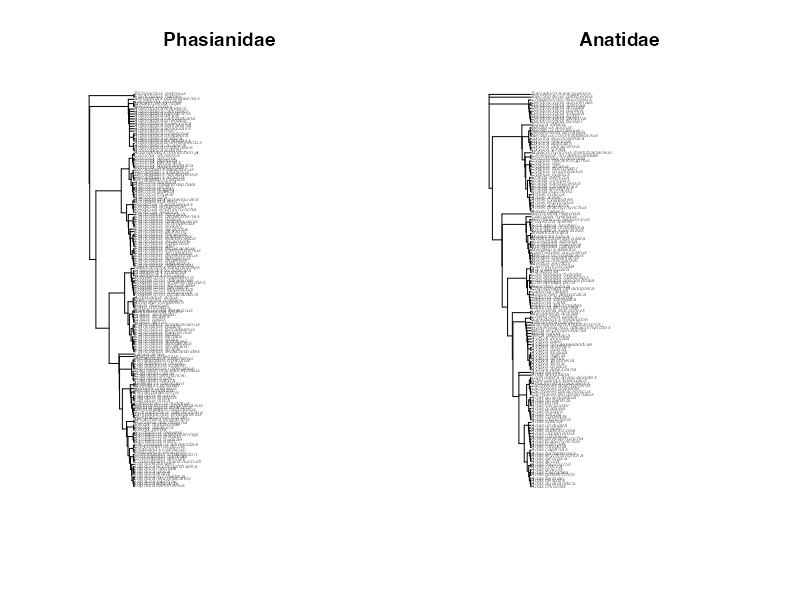

In [66]:
phy_fas <- build_pruned_family_tree(bird, fam1, n_keep = 500, seed = 123)
phy_ana <- build_pruned_family_tree(bird, fam2, n_keep = 400, seed = 123)

par(mfrow = c(1,2))
plot(phy_fas, main = fam1, cex = .35)
plot(phy_ana, main = fam2, cex = .35)
par(mfrow = c(1,1))

In [67]:
aligned_fas <- align_traits(phy_fas, birdbase, "Primary Diet", "IOC World Bird List (v15.1)")
aligned_ana <- align_traits(phy_ana, birdbase, "Primary Diet", "IOC World Bird List (v15.1)")

In [68]:
pf <- prep_tree_trait(aligned_fas$phy, aligned_fas$trait)
pa <- prep_tree_trait(aligned_ana$phy, aligned_ana$trait)

In [69]:
# 1) Phasianidae — phylogeny × diet (alpha ~ 0.5)
res_fas_x <- build_edges_nodes(pf$phy, pf$trait, alpha = 0.50, k = 13)
send_to_cyto(res_fas_x$nodes, res_fas_x$edges,
             title = "Phasianidae_phylo×diet_a=0.50_k=13")

# 2) Phasianidae — phylogeny only (alpha = 1)
res_fas_p <- build_edges_nodes(pf$phy, pf$trait, alpha = 1.00, k = 13)
send_to_cyto(res_fas_p$nodes, res_fas_p$edges,
             title = "Phasianidae_phylogeny_only_k=13")

# 3) Anatidae — phylogeny × diet
res_ana_x <- build_edges_nodes(pa$phy, pa$trait, alpha = 0.50, k = 14)
send_to_cyto(res_ana_x$nodes, res_ana_x$edges,
             title = "Anatidae_phylo×diet_a=0.50_k=14")

# 4) Anatidae — phylogeny only
res_ana_p <- build_edges_nodes(pa$phy, pa$trait, alpha = 1.00, k = 14)
send_to_cyto(res_ana_p$nodes, res_ana_p$edges,
             title = "Anatidae_phylogeny_only_k=14")

You are connected to Cytoscape!
Loading data...

Applying default style...

Applying preferred layout...

You are connected to Cytoscape!
Loading data...

Applying default style...

Applying preferred layout...

You are connected to Cytoscape!
Loading data...

Applying default style...

Applying preferred layout...

You are connected to Cytoscape!
Loading data...

Applying default style...

Applying preferred layout...



networkSUID 
     165375 